# decadal increasing for thedecadal report

Figure treated :
- figure 1-2-3 :Decadal averaged mole fraction in parts per million (ppm)
- figure 8 : National highest temperature by decade
- figure 9 : Global ocean heat content (OHC) anomalies
- figure 11 : Evolution of the global mean sea level
- figure 14 : mass changes of reference glaciers 
- figure 16 : Cumulative annual and decadal ice sheet mass change from 1992 to 2020 for the Greenland and Antarctic Ice Sheet 
- figure 17 : Sea ice extent for the Arctic and Antarctic



In [55]:
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns

creation of a function that get the decade average

In [2]:
def get_dec_average(lenght, begin, df):
    dec_mean_list = list()
    for i in range(lenght):
        decade_mean = df.loc[df["Year"].between(begin + 10*i,
                                                begin + 10*(i+1)),
                             "Annual Mass Change in m.w.e"].mean()
        dec_mean_list.append(decade_mean)
    return(dec_mean_list)

creation of a function that get the increasing beetween each decades

with the calculus : __Decade(n) - Decade(n-1)__

In [3]:
def get_increasing(decades, the_list):
    roc_list=list()
    for i in range(len(the_list)):
        if (len(roc_list) == 0):
            roc_list.append(the_list[i] - the_list[i])
        else :
            roc_list.append(the_list[i] - the_list[i-1])
    return(pd.DataFrame(data={'Decades': decades, 'Increasing': roc_list}))

## figure 1-2-3 : Decadal averaged mole fraction in parts per million (ppm)

In [4]:
mol_co2 = pd.read_csv("figure-1-2-3/figure 1 GHG decadal analysis.csv") 
mol_ch4 = pd.read_csv("figure-1-2-3/figure 2 GHG decadal analysis.csv") 
mol_n2o = pd.read_csv("figure-1-2-3/figure 3 GHG decadal analysis.csv") 
df_mol_co2 = pd.DataFrame(mol_co2.values, columns=mol_co2.columns)
df_mol_ch4 = pd.DataFrame(mol_ch4.values, columns=mol_ch4.columns)
df_mol_n2o = pd.DataFrame(mol_n2o.values, columns=mol_n2o.columns)

In [5]:
df_mol_n2o

,N2O,averaged mole fraction,averaged growth rate,max growth,min growth,uncert of the aver
0,1750,270.1,NaN,NaN,NaN,NaN
1,1991-2000,312.05,0.71,1.1,0.2,2.156257
2,2001-2010,319.71,0.77,1.0,0.6,2.361944
3,2011-2020,328.68,0.98,1.2,0.8,2.923392


__Be carefull the first values are based on the 1750 value__

In [6]:
list_mol_co2_roc = get_increasing(df_mol_co2["CO2"],
                                 df_mol_co2["averaged mole fraction"])
list_mol_co2_roc

,Decades,Increasing
0,1750,0.00
1,1991-2000,83.49
2,2001-2010,18.49
3,2011-2020,21.73


In [7]:
list_mol_ch4_roc = get_increasing(df_mol_ch4["CH4"],
                                 df_mol_ch4["averaged mole fraction"])
list_mol_ch4_roc

,Decades,Increasing
0,1750,0.0
1,1991-2000,1032.2
2,2001-2010,31.1
3,2011-2020,57.7


In [8]:
list_mol_n2o_roc = get_increasing(df_mol_n2o["N2O"],
                                 df_mol_n2o["averaged mole fraction"])
list_mol_n2o_roc

,Decades,Increasing
0,1750,0.00
1,1991-2000,41.95
2,2001-2010,7.66
3,2011-2020,8.97


## figure 8 : National highest temperature by decade


In [9]:
core_nat_dec = pd.read_csv("figure-8/Figure 8-source data-National extremes by decade.csv") 
df_nat_dec = pd.DataFrame(core_nat_dec.values,columns=core_nat_dec.columns,index=core_nat_dec.index).transpose()
df_nat_dec_cleaned = df_nat_dec.set_axis(df_nat_dec.loc["1"], axis='columns').drop("1")
df_nat_dec_cleaned

1,Mesure,Decades,RA I,RA II,RA III,RA IV,RA V,RA VI,Total
2,Rainfall,1961-1970,3,2,0,2,1,5,13
3,Rainfall,1971-1980,5,3,1,0,1,4,14
4,Rainfall,1981-1990,1,0,1,0.5,2,7,11.5
5,Rainfall,1991-2000,2,6,2,1,0,5,16
6,Rainfall,2001-2010,6,2,3,4,1,7,23
7,Rainfall,2011-2020,5,5,0,3.5,0,6,19.5
8,High temp,1961-1970,2,0,0.5,0,1,0.33,3.83
9,High temp,1971-1980,3,1,1,2.5,2,1,10.5
10,High temp,1981-1990,1,2,1,1.5,0,1,6.5
11,High temp,1991-2000,4,2.5,0.5,1.5,1,6.33,15.83


In [10]:
df_nat_dec_cleaned['Total'] = df_nat_dec_cleaned['Total'].astype(float)
df_nat_dec_reduced = df_nat_dec_cleaned.loc[df_nat_dec_cleaned["Mesure"]=="High temp",["Decades","Total"]]

In [11]:
list_nat_dec_roc = get_increasing(df_nat_dec_reduced["Decades"],
                                  df_nat_dec_reduced["Total"])
list_nat_dec_roc

,Decades,Increasing
8,1961-1970,0.00
9,1971-1980,6.67
10,1981-1990,-4.00
11,1991-2000,9.33
12,2001-2010,5.67
13,2011-2020,16.34


## figure 9 : global ocean heat content (OHC) anomalies


In [12]:
glob_ohc = pd.read_csv("figure-9/global_OHC_60N60S_mean_spread_1960-2020_Jm2.csv")
df_glob_ohc = pd.DataFrame(glob_ohc.values, columns=glob_ohc.columns)
df_glob_ohc["time_as_date"] = pd.to_datetime(df_glob_ohc["time"], 
                                             unit='D',
                                             origin=pd.Timestamp('1950-01-01'))
df_glob_ohc_reduced = df_glob_ohc.loc[:,["time_as_date",
                   "ohc_mean_0-300m",
                   "ohc_mean_0-700m",
                   "ohc_mean_0-2000m",
                   "ohc_mean_700-2000m"]]
df_glob_ohc_reduced

,time_as_date,ohc_mean_0-300m,ohc_mean_0-700m,ohc_mean_0-2000m,ohc_mean_700-2000m
0,1960-06-30,-322379070.0,-510292100.0,-782375940.0,-273208640.0
1,1961-06-30,-297629280.0,-481744900.0,-731982720.0,-253750690.0
2,1962-06-30,-252260430.0,-425027550.0,-691054980.0,-244804450.0
3,1963-06-30,-285635940.0,-466175680.0,-715564290.0,-267147060.0
4,1964-06-30,-359340540.0,-507010210.0,-752094140.0,-244875550.0
...,...,...,...,...,...
56,2016-06-30,26926868.0,34438152.0,75282432.0,44536912.0
57,2017-06-30,55643436.0,84927432.0,144894340.0,64044172.0
58,2018-06-30,77594000.0,118205600.0,177100190.0,58503892.0
59,2019-06-30,103463320.0,154117710.0,226295360.0,74563744.0


In [13]:
def get_mean_values(decades, df_glob_ohc):
    #calculate the decade mean 
    decade_mean_list = list()
    decade_mean_roc_list = list()
    begin = 3832.0
    for i in range(6):
        decade_mean_0_3 = df_glob_ohc.loc[df_glob_ohc["time"].between(begin + 365*10*i,
                                                                  begin + 365*10*(i+1)),
                                      "ohc_mean_0-300m"].mean()
        decade_mean_0_7 = df_glob_ohc.loc[df_glob_ohc["time"].between(begin + 365*10*i,
                                                                  begin + 365*10*(i+1)),
                                      "ohc_mean_0-700m"].mean()
        decade_mean_0_20 = df_glob_ohc.loc[df_glob_ohc["time"].between(begin + 365*10*i,
                                                                  begin + 365*10*(i+1)),
                                      "ohc_mean_0-2000m"].mean()
        decade_mean_7_20 = df_glob_ohc.loc[df_glob_ohc["time"].between(begin + 365*10*i,
                                                                  begin + 365*10*(i+1)),
                                      "ohc_mean_700-2000m"].mean()
        decade_mean_list.append([decade_mean_0_3,
                                decade_mean_0_7,
                                decade_mean_0_20,
                                decade_mean_7_20])
        if (len(decade_mean_list) == 1):
            decade_mean_roc_list.append([decade_mean_0_3 - decade_mean_list[0][0],
                                       decade_mean_0_7 - decade_mean_list[0][1],
                                       decade_mean_0_20 - decade_mean_list[0][2],
                                       decade_mean_7_20 - decade_mean_list[0][3]])
        else :
            decade_mean_roc_list.append([decade_mean_list[i][0] - decade_mean_list[i-1][0],
                                       decade_mean_list[i][1] - decade_mean_list[i-1][1],
                                       decade_mean_list[i][2] - decade_mean_list[i-1][2],
                                       decade_mean_list[i][3] - decade_mean_list[i-1][3]])
    decade_mean_roc_list = np.transpose(decade_mean_roc_list)
    return (pd.DataFrame(data={'Decades': decades, 
                               '0-300m': decade_mean_roc_list[0],
                               '0-700m': decade_mean_roc_list[1],
                               '0-2000m': decade_mean_roc_list[2],
                               '700-2000m': decade_mean_roc_list[3]}))
    

In [14]:
time_labels = ["1961\n-1970","1971\n-1980","1981\n-1990","1991\n-2000","2001\n-2010","2011\n-2020"]
decade_mean_list = get_mean_values(time_labels, df_glob_ohc)
decade_mean_df_melted = pd.melt(decade_mean_list, id_vars="Decades").rename(columns = {'variable':'depth'})
decade_mean_df_melted

,Decades,depth,value
0,1961\n-1970,0-300m,0.000000e+00
1,1971\n-1980,0-300m,8.347516e+06
2,1981\n-1990,0-300m,7.957176e+07
3,1991\n-2000,0-300m,5.574904e+07
4,2001\n-2010,0-300m,1.136573e+08
5,2011\n-2020,0-300m,1.101394e+08
6,1961\n-1970,0-700m,0.000000e+00
7,1971\n-1980,0-700m,1.247715e+07
8,1981\n-1990,0-700m,9.527909e+07
9,1991\n-2000,0-700m,7.610925e+07


In [15]:
decade_mean_df_melted.to_csv("data/Figure 9 - dec global ocean heat content (OHC) anomalies.csv")

## figure 11 : Evolution of the global mean sea level

In [16]:
repro_gmsl = pd.read_csv("figure-11/reprocessed_gmsl_data.csv") 
df_repro_gmsl = pd.DataFrame(repro_gmsl.values, columns=repro_gmsl.columns)

df_repro_gmsl["time"] = pd.to_datetime(df_repro_gmsl["time"], format="%Y-%m-%d")
df_repro_gmsl

,time,msl_tpa_corr_filt,msl_uncertainty,quad_trd_values
0,1993-01-31,0.0,8.724196,5.700226
1,1993-02-28,2.9488,8.647409,5.821215
2,1993-03-31,4.816998,8.571742,5.955996
3,1993-04-30,6.57138,8.496057,6.087258
4,1993-05-31,6.896864,8.418533,6.223754
...,...,...,...,...
343,2021-08-31,99.921918,4.466888,100.07667
344,2021-09-30,100.483309,4.486964,100.490274
345,2021-10-31,100.632301,4.50827,100.918521
346,2021-11-30,100.815784,4.528592,101.333784


In [17]:
decade_mean_1 = df_repro_gmsl.loc[df_repro_gmsl["time"].dt.date.between(dt.date(1092, 1, 1),
                                                             dt.date(2001, 1, 1)),
                                  "msl_tpa_corr_filt"].mean()
decade_mean_2 = df_repro_gmsl.loc[df_repro_gmsl["time"].dt.date.between(dt.date(2001, 1, 1),
                                                             dt.date(2011, 1, 1)),
                                  "msl_tpa_corr_filt"].mean()
decade_mean_3 = df_repro_gmsl.loc[df_repro_gmsl["time"].dt.date.between(dt.date(2011, 1, 1),
                                                             dt.date(2021, 1, 1)),
                                  "msl_tpa_corr_filt"].mean()
gmsl_decade_mean_list = [decade_mean_1,decade_mean_2,decade_mean_3]


__Be carefull the first increasing are based on the 1993-2000 value__

In [18]:
time_labels = ["1993-2000","2001-2010","2011-2020"]
list_nat_dec_roc = get_increasing(time_labels,
                                  gmsl_decade_mean_list)
list_nat_dec_roc

,Decades,Increasing
0,1993-2000,0.000000
1,2001-2010,24.628938
2,2011-2020,36.687322


In [19]:
df_dec_glob_mass_glac_average = pd.DataFrame(data={'Decades': time_labels, 
                                                   'global mean sea level': gmsl_decade_mean_list})


In [20]:
df_dec_glob_mass_glac_average.to_csv("data/Figure 11 - dec Evolution of the global mean sea level.csv")

## figure 14 : mass changes of reference glaciers 

In [21]:
glob_mass_glac = pd.read_csv("figure-14/Figure 14 Global annual mass change of reference glaciers (left).csv") 
df_glob_mass_glac = pd.DataFrame(glob_mass_glac.values, columns=glob_mass_glac.columns)
df_glob_an_mass_glac = df_glob_mass_glac.loc[:,("Year","Annual Mass Change in m.w.e")]
df_glob_an_mass_glac

,Year,Annual Mass Change in m.w.e
0,1950.0,-1.142
1,1951.0,-0.345
2,1952.0,-0.561
3,1953.0,-0.557
4,1954.0,-0.414
...,...,...
68,2018.0,-1.174
69,2019.0,-1.207
70,2020.0,-0.965
71,2021.0,-0.747


In [22]:
# get the decade average
dec_glob_mass_glac_average_list = get_dec_average(7, 1950.5, df_glob_an_mass_glac)

In [23]:
dec_list = ["1951-1960","1961-1970","1971-1980","1981-1990","1991-2000","2001-2010","2011-2020"]
df_glob_an_mass_glac_roc = get_increasing(dec_list,
                                  dec_glob_mass_glac_average_list)
df_glob_an_mass_glac_roc

,Decades,Increasing
0,1951-1960,0.0000
1,1961-1970,0.2090
2,1971-1980,-0.0876
3,1981-1990,-0.0223
4,1991-2000,-0.2120
5,2001-2010,-0.1117
6,2011-2020,-0.3600


In [24]:
df_dec_glob_mass_glac_average = pd.DataFrame(data={'Decades': dec_list, 'Annual Mass Change in m.w.e': dec_glob_mass_glac_average_list})
df_dec_glob_mass_glac_average

,Decades,Annual Mass Change in m.w.e
0,1951-1960,-0.3544
1,1961-1970,-0.1454
2,1971-1980,-0.2330
3,1981-1990,-0.2553
4,1991-2000,-0.4673
5,2001-2010,-0.5790
6,2011-2020,-0.9390


In [25]:
df_dec_glob_mass_glac_average.to_csv("data/ Figure - 14 decade global annual mass change of reference glaciers (left).csv")

## figure 16 : Cumulative annual and decadal ice sheet mass change from 1992 to 2020 for the Greenland and Antarctic Ice Sheet 


In [34]:
df_ice_sheet_mass_dec_incre = pd.DataFrame(data={'Decades': ["1992-2000", "2001-2010", "2011-2020"], 
                                                  'Greenland': [-342, -2040,-2510], 
                                                  'Antarctica': [-414, -820, -1430]})
df_ice_sheet_mass_dec_incre

,Decades,Greenland,Antarctica
0,1992-2000,-342,-414
1,2001-2010,-2040,-820
2,2011-2020,-2510,-1430


In [40]:
df_ice_percent = pd.DataFrame(data={'Decades': ["1992-2000", "2001-2010", "2011-2020"], 
                                                  'Greenland': [-342, -2040,-2510], 
                                                  'Antarctica': [-414, -820, -1430],
                                                  'General': [(-342-414)/2, (-2040-820)/2, (-2510-1430)/2]})
df_ice_percent

,Decades,Greenland,Antarctica,General
0,1992-2000,-342,-414,-378.0
1,2001-2010,-2040,-820,-1430.0
2,2011-2020,-2510,-1430,-1970.0


In [49]:
result = float(df_ice_percent.loc[df_ice_percent["Decades"] == "2011-2020", "General"])*100//float(df_ice_percent.loc[df_ice_percent["Decades"] == "2001-2010", "General"])
result 

137.0

In [53]:
result = float(df_ice_percent.loc[df_ice_percent["Decades"] == "2011-2020", "Antarctica"])*100//float(df_ice_percent.loc[df_ice_percent["Decades"] == "2001-2010", "Antarctica"])
result

174.0

In [52]:
result = float(df_ice_percent.loc[df_ice_percent["Decades"] == "2011-2020", "Greenland"])*100//float(df_ice_percent.loc[df_ice_percent["Decades"] == "2001-2010", "Greenland"])
result

123.0

In [58]:
df_ice_percent_melted = pd.melt(df_ice_percent, id_vars="Decades").rename(columns = {'value':'Cumulative mass increasing (Gt)',
                                                                                     'variable':'Greenland/Antartica'})


In [61]:
df_ice_sheet_mass_dec_val = pd.DataFrame(data={'Decades': ["1992-2000", "2001-2010", "2011-2020"], 
                                                  'Greenland': [-342, -2040-342,-2510-2040-342], 
                                                  'Antarctica': [-414, -820-414, -1430-820-414]})
df_ice_sheet_mass_dec_val_melted = pd.melt(df_ice_sheet_mass_dec_val, id_vars="Decades").rename(columns = {'value':'Cumulative mass balance (Gt)',
                                                                                                          'variable':'Greenland/Antartica'})
df_ice_sheet_mass_dec_val_melted


,Decades,Greenland/Antartica,Cumulative mass balance (Gt)
0,1992-2000,Greenland,-342
1,2001-2010,Greenland,-2382
2,2011-2020,Greenland,-4892
3,1992-2000,Antarctica,-414
4,2001-2010,Antarctica,-1234
5,2011-2020,Antarctica,-2664


<Axes: xlabel='Decades', ylabel='Cumulative mass increasing (Gt)'>

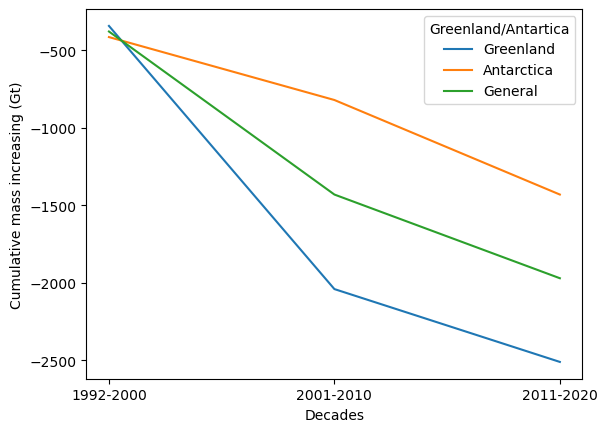

In [63]:
sns.lineplot(df_ice_percent_melted, x="Decades", y="Cumulative mass increasing (Gt)", hue="Greenland/Antartica")

<Axes: xlabel='Decades', ylabel='Cumulative mass balance (Gt)'>

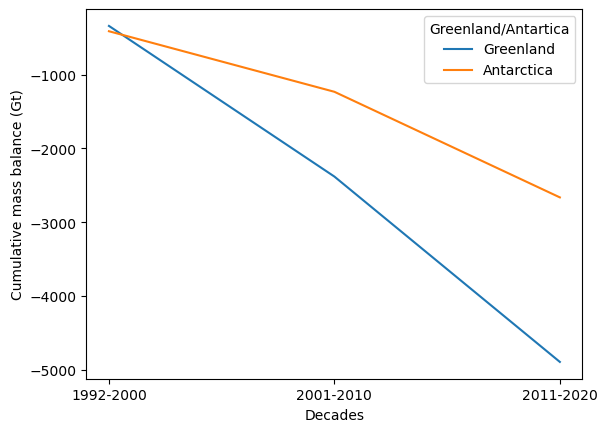

In [64]:
sns.lineplot(df_ice_sheet_mass_dec_val_melted, x="Decades", y="Cumulative mass balance (Gt)", hue="Greenland/Antartica")

In [ ]:
df_ice_sheet_mass_dec_val_melted.to_csv("data/ Figure 16 cumulative mass balance decades.csv")

# figure 17 : Sea ice extent for the Arctic and Antarctic

In [ ]:
sea_ice_season_extr = pd.read_csv("figure-16-17/Figure 17 source data - Sea ice seasonal extremes.csv") 
df_sea_ice_season_extr = pd.DataFrame(sea_ice_season_extr.values, 
                                    columns=sea_ice_season_extr.columns,
                                    index=sea_ice_season_extr.index)
df_sea_ice_season_extr

In [ ]:
df_sea_ice_season_extr_1 = df_sea_ice_season_extr.drop([0,1,2,3,4,5])
df_sea_ice_season_extr_2 = df_sea_ice_season_extr_1.rename(columns={'Unnamed: 0': 'Date',
                                                '1979': 'NH max',
                                                '1980': 'NH min',
                                                '1981': 'SH max',
                                                '1982': 'SH min',
                                                '1983': '10-year mean NH max',
                                                '1984': '10-year mean NH min',
                                                '1985': '10-year mean SH max',
                                                '1986': '10-year mean SH min'
                                                })
df_sea_ice_season_extr_cleaned = df_sea_ice_season_extr_2.loc[:, ['Date',
                                                            'NH max',
                                                            'NH min',
                                                            'SH max',
                                                            'SH min',
                                                            '10-year mean NH max',
                                                            '10-year mean NH min',
                                                            '10-year mean SH max',
                                                            '10-year mean SH min']]
df_sea_ice_season_extr_cleaned["Date"] = df_sea_ice_season_extr_cleaned["Date"].astype(float)
df_sea_ice_season_extr_cleaned["NH max"] = df_sea_ice_season_extr_cleaned["NH max"].astype(float)
df_sea_ice_season_extr_cleaned["NH min"] = df_sea_ice_season_extr_cleaned["NH min"].astype(float)
df_sea_ice_season_extr_cleaned["SH max"] = df_sea_ice_season_extr_cleaned["SH max"].astype(float)
df_sea_ice_season_extr_cleaned["SH min"] = df_sea_ice_season_extr_cleaned["SH min"].astype(float)
df_sea_ice_season_extr_cleaned

In [ ]:
# get the decade average
dec_sea_ice_season_extr_list = list()
dec_sea_ice_season_extr_list_roc = list()
for i in range(4):
    decade_mean_nhmax = df_sea_ice_season_extr_cleaned.loc[df_sea_ice_season_extr_cleaned["Date"].between(1980.5 + 10*i,
                                            1980.5 + 10*(i+1)),
                         "NH max"].mean()
    decade_mean_nhmin = df_sea_ice_season_extr_cleaned.loc[df_sea_ice_season_extr_cleaned["Date"].between(1980.5 + 10*i,
                                            1980.5 + 10*(i+1)),
                         "NH min"].mean()
    decade_mean_shmax = df_sea_ice_season_extr_cleaned.loc[df_sea_ice_season_extr_cleaned["Date"].between(1980.5 + 10*i,
                                            1980.5 + 10*(i+1)),
                         "SH max"].mean()
    decade_mean_shmin = df_sea_ice_season_extr_cleaned.loc[df_sea_ice_season_extr_cleaned["Date"].between(1980.5 + 10*i,
                                            1980.5 + 10*(i+1)),
                         "SH min"].mean()
    dec_sea_ice_season_extr_list.append([decade_mean_nhmax,
                                decade_mean_nhmin,
                                decade_mean_shmax,
                                decade_mean_shmin])
    if (len(dec_sea_ice_season_extr_list) == 1):
        dec_sea_ice_season_extr_list_roc.append([0,0,0,0])
    else :
        dec_sea_ice_season_extr_list_roc.append([dec_sea_ice_season_extr_list[i][0] - dec_sea_ice_season_extr_list[i-1][0],
                                     dec_sea_ice_season_extr_list[i][1] - dec_sea_ice_season_extr_list[i-1][1],
                                     dec_sea_ice_season_extr_list[i][2] - dec_sea_ice_season_extr_list[i-1][2],
                                     dec_sea_ice_season_extr_list[i][3] - dec_sea_ice_season_extr_list[i-1][3]])
dec_list = ["1981-1990","1991-2000","2001-2010","2011-2020"]
dec_sea_ice_season_extr_list_roc = np.transpose(dec_sea_ice_season_extr_list_roc)
df_dec_sea_ice_season_extr_roc = pd.DataFrame(data={'Decades': dec_list, 
                               'Increasing_NH_max': dec_sea_ice_season_extr_list_roc[0],
                               'Increasing_NH_min': dec_sea_ice_season_extr_list_roc[1],
                               'Increasing_SH_max': dec_sea_ice_season_extr_list_roc[2],
                               'Increasing_SH_min': dec_sea_ice_season_extr_list_roc[3]})
df_dec_sea_ice_season_extr = pd.DataFrame(data={'Decades': dec_list, 
                               'Increasing_NH_max': dec_sea_ice_season_extr_list[0],
                               'Increasing_NH_min': dec_sea_ice_season_extr_list[1],
                               'Increasing_SH_max': dec_sea_ice_season_extr_list[2],
                               'Increasing_SH_min': dec_sea_ice_season_extr_list[3]})

df_dec_sea_ice_season_extr

In [ ]:
df_dec_sea_ice_season_extr_list = pd.DataFrame(data={'Decades': dec_list, 
                               'NH_max': dec_sea_ice_season_extr_list[0],
                               'NH_min': dec_sea_ice_season_extr_list[1],
                               'SH_max': dec_sea_ice_season_extr_list[2],
                               'SH_min': dec_sea_ice_season_extr_list[3]})
df_dec_sea_ice_season_extr_list

In [ ]:
df_sea_ice_season_extr_cleaned.to_csv("data/Figure 17 - Sea ice seasonal extremes year.csv")
df_dec_sea_ice_season_extr_list.to_csv("data/Figure 17 - Sea ice seasonal extremes decadal.csv")
